<b><font size=20, color='#A020F0'>Xarray

Hannah Zanowski<br>
10/7/24<br>

#### <span style="color:green">Learning Goals</span>
By the end of this notebook you will
1. Become familiar with the basic data structures in xarray and how to create them
2. Practice reading in netcdf files and doing computations on xarray datasets

#### Resources
[Xarray Documentation](http://xarray.pydata.org/en/stable/)<br>
[Xarray API reference](http://xarray.pydata.org/en/stable/api.html)<br>

# A little about Xarray

Xarray is an extra-glorious library for working with multi-dimensional data that was inspired by Pandas. It uses numpy's N-D arrays, but with _labels_, which makes working with multi-dimensional data much more inuitive and streamlined. It is excellent at handling gridded data, including the [netCDF](https://www.unidata.ucar.edu/software/netcdf/) file format, which is a very common format for atmospheric and oceanic science data. Xarray is one of the packages I use the most in my work.

Let's begin by importing xarray (and a few others):

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

---

## 1. DataArrays
[DataArray](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.html) objects are a core data structure in xarray. There are 4 key elements associated with a DataArray:
1. `values`: the numpy array that holds the data
2. `dims`: the names for each axis of your data (e.g., 'x','y')
3. `coords`: the coordinates that label each data point (e.g., arrays for latitude, dates)
4. `attrs`: the attributes of the data (e.g., metadata like units, descriptions of the variables, etc)

### Creating an xarray DataArray
It's straightforward to make a DataArray. Here's what one looks like in its simplest form:

In [2]:
da=xr.DataArray(np.arange(2,22,2))
da

<xarray.DataArray (dim_0: 10)>
array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])
Dimensions without coordinates: dim_0

But this isn't particularly instructive. We need to add arguments for the dimensions, coordinates, and some attributes in order for the values in our DataArray to be meaningful. Let's use our Argo float data from Homework 1 to make a DataArray:

In [3]:
#Read in the data
path='../Homework/data/'
argo=np.load(path+'20210901_IndianOcean.npz')
list(argo.keys())

['temperature', 'salinity', 'pressure', 'latitude', 'longitude']

In [4]:
#Make the argo temperature data a data array
da=xr.DataArray(argo['temperature'],dims=['pressure'],coords={'pressure':argo['pressure']}) #arguments here are data, dimensions, coordinates
da

<xarray.DataArray (pressure: 1218)>
array([28.691, 28.671, 28.437, ...,    nan,    nan,    nan], dtype=float32)
Coordinates:
  * pressure  (pressure) float32 4.3 10.3 15.3 19.9 25.9 ... nan nan nan nan nan

Let's add a units attribute to our DataArray. We do that with `.attrs[]`
><b><font color='blue'>Note: </font></b> Attributes can be whatever you want!

In [ ]:
da.attrs['units']='degC'
da

### Accessing info from a DataArray

You can access the values, coordinates, dimensions,and attributes of your DataArray with the following commands:

In [ ]:
da.values

In [ ]:
da.coords

In [ ]:
da.dims

In [ ]:
da.attrs

### Built-in plotting

Like Pandas, there is built-in plotting with xarray:

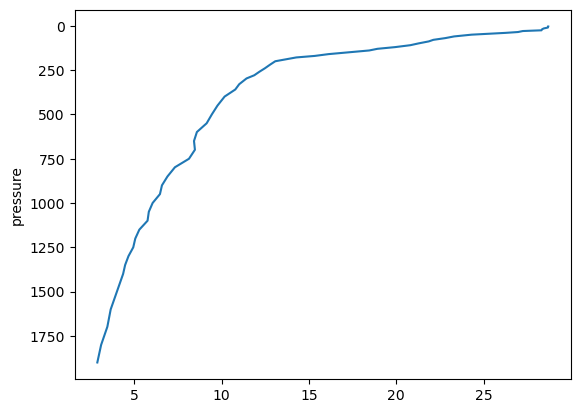

In [5]:
da.plot(y='pressure',yincrease=False) #pressure increases downward in the ocean, 
                                      #so tell xarray to plot the y-axis so it is decreasing upward

---

## 2. Datasets
[Dataset](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.html) objects are another core data structure in xarray. Like the Pandas Dataframe, an xarray Dataset is just a container for a collection of xarray DataArrays that <b>share coordinates.</b>

### Creating an xarray Dataset
Let's use our argo data to make our first xarray Dataset. Datasets need, at minimum, the following information:
1. `data_vars`: a dictionary `{}` that maps variable names to the data they represent
2. `coords`: the coordinates of the data variables<br>

As with DataArrays, you can also set attributes with `attrs`. Attributes are techincally not _required_ to create a Dataset (just like for DataArrays), but you should include them! They can be set globally for the dataset and for individual data variables. For some common attributes, check out the [CF Conventions](http://cfconventions.org/Data/cf-conventions/cf-conventions-1.7/cf-conventions.html#_description_of_the_data)

><font color='blue'><b>Note:</b></font> The data that you provide in `data_vars` can be DataArrays, pandas objects, etc, or you can create new data as long as it is a tuple of the form `(dims, data[, attrs])`, which xarray will interpret.

In [6]:
#Create an xarray Dataset
ds=xr.Dataset(data_vars={'temp':('pressure',argo['temperature'],{'units':'degC'}),
                         'salt':('pressure',argo['salinity'],{'units':'PSU'})},
             coords={'pressure':('pressure',argo['pressure'])},
             attrs={'Description':'Argo salinity and temperature data from the equatorial Indian Ocean'})
ds

<xarray.Dataset>
Dimensions:   (pressure: 1218)
Coordinates:
  * pressure  (pressure) float32 4.3 10.3 15.3 19.9 25.9 ... nan nan nan nan nan
Data variables:
    temp      (pressure) float32 28.69 28.67 28.44 28.34 ... nan nan nan nan
    salt      (pressure) float32 34.92 34.92 34.9 34.9 34.97 ... nan nan nan nan
Attributes:
    Description:  Argo salinity and temperature data from the equatorial Indi...

Awesome! But what did we just _do_? Let's unpack the `data_vars` argument in `xr.Dataset()`:<br>

As mentioned above, `data_vars` is a dictionary, and it maps the names of variables to the data from those variables. It does this in the form {key:tuple}. For just the variable 'temp' this looks like <br>`{'temp':('pressure',argo['temperature'],{'units':'degC'})}`<br>

Here `'temp'` is the dictionary key (the name of the variable) and the tuple contains the pieces of information we are assigning to that variable name. In this case the tuple for `'temp'` contains three pieces of information:
1. The dimensions--in this case the only dimension our data has is `'pressure'`
><b><font color='red'>Note:</font></b> If your data variable has more than 1 dimension, you will need to provide these as a tuple, e.g. ('dim1','dim2',...)
2. The data itself--in this case it's the temperature data from our argo float, `argo['temperature']`
3. The attributes of our data variable, which is _another_ dictionary--in this case we only gave the argo temperature data variable a 'units' attribute. Because this is another dictionary, it maps the key (`'units'`) to the value (`'degC'`)

The same goes for the `coords` and `attrs` arguments--these are both dictionaries that map a key to a value. In the case of `coords` we have one coordinate, pressure, which is the key, and we map it to the actual pressure values (`argo['pressure']`)

><font color='darkmagenta'><b>Reminder:</b></font> If this seems a bit overwhelming, at the end of the day all we're really doing is _labeling_ our data so that it is easier to work with!

#### Adding/dropping data variables
You can add data variables to a dataset after you've created it:

In [7]:
#Add a data variable for the square of the temperature
ds['temp_squared']=ds.temp*ds.temp
ds

<xarray.Dataset>
Dimensions:       (pressure: 1218)
Coordinates:
  * pressure      (pressure) float32 4.3 10.3 15.3 19.9 25.9 ... nan nan nan nan
Data variables:
    temp          (pressure) float32 28.69 28.67 28.44 28.34 ... nan nan nan nan
    salt          (pressure) float32 34.92 34.92 34.9 34.9 ... nan nan nan nan
    temp_squared  (pressure) float32 823.2 822.0 808.7 803.2 ... nan nan nan nan
Attributes:
    Description:  Argo salinity and temperature data from the equatorial Indi...

You can also drop data variables:

In [8]:
ds=ds.drop('temp_squared')
ds

<xarray.Dataset>
Dimensions:   (pressure: 1218)
Coordinates:
  * pressure  (pressure) float32 4.3 10.3 15.3 19.9 25.9 ... nan nan nan nan nan
Data variables:
    temp      (pressure) float32 28.69 28.67 28.44 28.34 ... nan nan nan nan
    salt      (pressure) float32 34.92 34.92 34.9 34.9 34.97 ... nan nan nan nan
Attributes:
    Description:  Argo salinity and temperature data from the equatorial Indi...

#### Using to_dataset() with DataArrays
If you have some defined DataArrays, you can use xarray's [to_dataset()](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.to_dataset.html) to create a dataset directly from them. Let's turn our argo temperature DataArray into a DataSet

In [9]:
ds2=da.to_dataset(name='temp') #because we set up our DataArray nicely, all to_dataset needs is a name for that variable
ds2

<xarray.Dataset>
Dimensions:   (pressure: 1218)
Coordinates:
  * pressure  (pressure) float32 4.3 10.3 15.3 19.9 25.9 ... nan nan nan nan nan
Data variables:
    temp      (pressure) float32 28.69 28.67 28.44 28.34 ... nan nan nan nan

---

## 3. Working with xarray datasets
To show you the real power of xarray, we'll be using [HadISST1](https://www.metoffice.gov.uk/hadobs/hadisst/data/download.html) sea surface temperature data from Jan 2000 to Dec 2020 in the following examples

### Reading in data
You can read in [netCDF](https://www.unidata.ucar.edu/software/netcdf/) data using [open_dataset](http://xarray.pydata.org/en/stable/generated/xarray.open_dataset.html) (or [open_mfdataset](http://xarray.pydata.org/en/stable/generated/xarray.open_mfdataset.html) to open multiple files at once!)

In [10]:
ds=xr.open_dataset('data/HadISST_201501_201912.nc')
ds

<xarray.Dataset>
Dimensions:    (time: 60, nv: 2, latitude: 180, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-16T12:00:00 ... 2019-12-16T12:00:00
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    14/9/2021 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

### Accessing data

There's a lot of information in this dataset, but how do we interpret it? Let's start by getting the attributes of the data variable `sst`:

In [11]:
ds.sst.attrs

{'standard_name': 'sea_surface_temperature',
 'long_name': 'sst',
 'units': 'C',
 'cell_methods': 'time: lat: lon: mean'}

Because the attributes are a dictionary, we can also access a specific attribute if we know its name:

In [12]:
#Get only the units attribute of SST
ds.sst.attrs['units']

'C'

---

### <font color='blue'> Class Question </font>
How would you access the `description` attribute for the entire dataset?

---

Accessing specific data variables is much like in pandas when we access columns, so if we wanted to access data for the sst variable we would just do the following:

In [13]:
ds['sst']
#or
#ds.sst

<xarray.DataArray 'sst' (time: 60, latitude: 180, longitude: 360)>
[3888000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-01-16T12:00:00 ... 2019-12-16T12:00:00
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

#### Selecting data
You can [select data from a Dataset or DataArray using](http://xarray.pydata.org/en/stable/user-guide/indexing.html) `.sel()` or `.isel()`. Like pandas, `.sel()` allows you to select based on coordinate names, etc and `.isel()` allows you to select data based on its integer index (like we have to do with pure numpy arrays).

In [14]:
ds.sst.sel(time='2015')
#or
#ds['sst'].sel({'time':'2015'})

<xarray.DataArray 'sst' (time: 12, latitude: 180, longitude: 360)>
[777600 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-01-16T12:00:00 ... 2015-12-16T12:00:00
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

In [15]:
#Get SST data at the first time
ds.sst.isel(time=0)
#or
#ds['sst'].isel({'time':0})

<xarray.DataArray 'sst' (latitude: 180, longitude: 360)>
[64800 values with dtype=float32]
Coordinates:
    time       datetime64[ns] 2015-01-16T12:00:00
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

Both `.sel()` and `.isel()` can take multiple inputs:

In [16]:
#Choose sst data at a specific time and point
ds.sst.sel(time='2017-02',latitude=10.5,longitude=160.5)

<xarray.DataArray 'sst' (time: 1)>
[1 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-02-16T12:00:00
    latitude   float32 10.5
    longitude  float32 160.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

But what if you don't remember or know the _exact_ coordinate values? You can set the `method` keyword argument!

In [17]:
ds.sst.sel(time='2017-02',latitude=10,longitude=160.5,method='nearest')

<xarray.DataArray 'sst' ()>
[1 values with dtype=float32]
Coordinates:
    time       datetime64[ns] 2017-02-16T12:00:00
    latitude   float32 10.5
    longitude  float32 160.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

#### Slicing
If you want to select a range of data you need to use xarray's `slice()` argument. Let's use slice to select a subset of data for our entire dataset. In this case we'll subset the data so that it spans 30.5˚E-179.5˚E and 45˚N to 90˚N:

In [19]:
ds_slice=ds.sel(time=slice('2015-01-16','2016-12-16'),longitude=slice(30.5,179.5),latitude=slice(45,None))
#or
#ds_slice=ds.sel({'time':slice('2015-01-16','2016-12-16'),'longitude':slice(30.5,179.5),'latitude':slice(45,None)})

Let's make a quick 2D plot of SST using the first date:

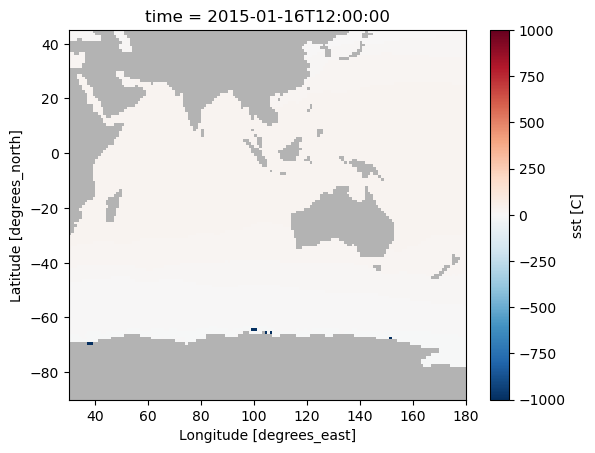

In [20]:
ds_slice.sst.sel(time='2015-01').plot()
plt.gca().set_facecolor('0.7') #hack for filling in the land

#This is equivalent to
#ds_slice.sst.isel(time=0).plot()
#ds.slice.sst.sel(time='2015-01-16').plot()

Hmmmm, this isn't quite what we wanted...

><b><font color='red'>First</font></b>, we aren't in the right region--we're looking at Australia although we sliced our data to be in the Northern Hemisphere.<br>
><b><font color='red'>Second</font></b>, the range of SSTs is wildly unphysical. 

Let's deal with the slicing issue first:

In [21]:
#Return the latitudes of the dataset
ds_slice.latitude

<xarray.DataArray 'latitude' (latitude: 135)>
array([ 44.5,  43.5,  42.5,  41.5,  40.5,  39.5,  38.5,  37.5,  36.5,  35.5,
        34.5,  33.5,  32.5,  31.5,  30.5,  29.5,  28.5,  27.5,  26.5,  25.5,
        24.5,  23.5,  22.5,  21.5,  20.5,  19.5,  18.5,  17.5,  16.5,  15.5,
        14.5,  13.5,  12.5,  11.5,  10.5,   9.5,   8.5,   7.5,   6.5,   5.5,
         4.5,   3.5,   2.5,   1.5,   0.5,  -0.5,  -1.5,  -2.5,  -3.5,  -4.5,
        -5.5,  -6.5,  -7.5,  -8.5,  -9.5, -10.5, -11.5, -12.5, -13.5, -14.5,
       -15.5, -16.5, -17.5, -18.5, -19.5, -20.5, -21.5, -22.5, -23.5, -24.5,
       -25.5, -26.5, -27.5, -28.5, -29.5, -30.5, -31.5, -32.5, -33.5, -34.5,
       -35.5, -36.5, -37.5, -38.5, -39.5, -40.5, -41.5, -42.5, -43.5, -44.5,
       -45.5, -46.5, -47.5, -48.5, -49.5, -50.5, -51.5, -52.5, -53.5, -54.5,
       -55.5, -56.5, -57.5, -58.5, -59.5, -60.5, -61.5, -62.5, -63.5, -64.5,
       -65.5, -66.5, -67.5, -68.5, -69.5, -70.5, -71.5, -72.5, -73.5, -74.5,
       -75.5, -76.5, -77.5, -78.5, -79.5, -80.5, -81.5, -82.5, -83.5, -84.5,
       -85.5, -86.5, -87.5, -88.5, -89.5], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 44.5 43.5 42.5 41.5 ... -86.5 -87.5 -88.5 -89.5
Attributes:
    units:          degrees_north
    long_name:      Latitude
    standard_name:  latitude

If you look closely at the dataset output, you'll see that this is because of the order that our latitude values are provided in the dataset--they go from 90N to 90S, _not_ 90S to 90N! We can fix this a couple of different ways:

>1. We can change the slice argument for latitude slightly: `slice(None,45)`
>2. We can just reset the latitude coordinate for the entire dataset

Let's use option 2 so we don't have to deal with it again. Here we'll be using [reindex()](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.reindex.html) to reindex the dataset based on our new latitude coordinate that starts at -89.5 and ends at 89.5:

In [23]:
ds=ds.reindex(latitude=list(reversed(ds.latitude))) #use reversed to reverse the original latitude list
ds

<xarray.Dataset>
Dimensions:    (time: 60, latitude: 180, longitude: 360, nv: 2)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-16T12:00:00 ... 2019-12-16T12:00:00
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    14/9/2021 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

#### Filtering with where()
Now let's deal with the second problem, which is the enormous and unphysical range of SST values. This weird range is because this dataset has some missing values under sea ice, and these are set to -1000. Let's get rid of those using xarray's [where()](http://xarray.pydata.org/en/stable/generated/xarray.where.html) function. 

><font color='red'><b>Note: </b></font>`where()` takes as input a condition on your data and replaces the values that <font color='red'><b>_DO NOT_</b></font> meet that condition with nan. If you want those values to be replaced with a value other than nan, use the `other` keyword argument.

Before we use `where()` to get rid of the missing values, we want to make a mask for land, which is currently set as nan. If we don't keep track of the land separately, then once we use `where()` both the missing values and land values will be the same.

In [24]:
land=np.isnan(ds.sst[0])

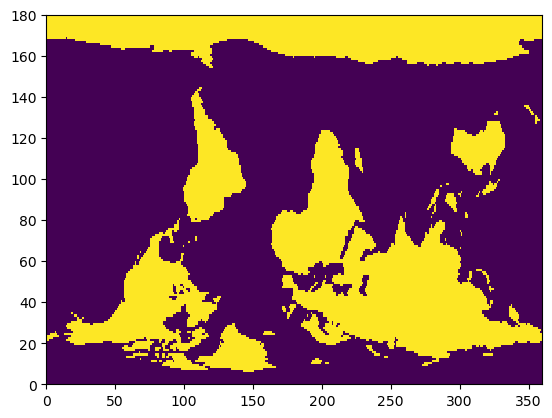

In [25]:
#make a quick plot with matplotlib's pcolormesh
plt.pcolormesh(land)

Now that we have our land mask let's use `.where()` to turn the missing values into nan:

In [26]:
ds=ds.where(ds.sst>-1000)

Let's add our land mask to the dataset:

In [27]:
ds['land']=land
ds

<xarray.Dataset>
Dimensions:    (time: 60, nv: 2, latitude: 180, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-16T12:00:00 ... 2019-12-16T12:00:00
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv, latitude, longitude) float32 nan nan nan ... nan nan
    sst        (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    land       (latitude, longitude) bool False False False ... True True True
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    14/9/2021 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

And finally, let's make another plot, but now using our SSTs without the missing values:

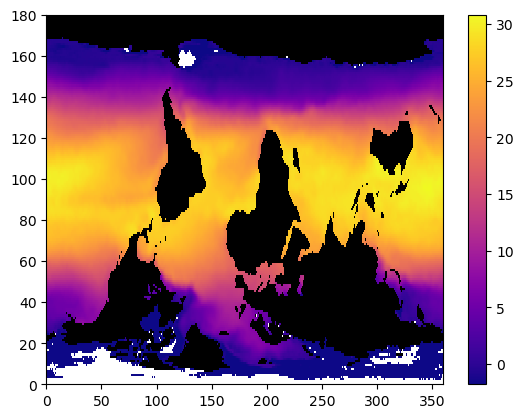

In [28]:
fig,ax=plt.subplots()
#add land first
ax.pcolormesh(ds.land,cmap=plt.cm.gray_r)
#then plot over the land with SSTs
cs=ax.pcolormesh(ds['sst'].sel(time='2015-01-16').squeeze(),cmap=plt.cm.plasma)
cbar=plt.colorbar(cs)

><font color='blue'><b>Note:</b></font> In this particular case, if all you wanted to do was plot the data and _not_ bother with `where()` you could just do the following once you read in your data:

```bash
cmap=plt.cm.plasma.copy()
cmap.set_under('0.5') #set values under the minimum value to be gray
fig,ax=plt.subplots()
#plot the SSTs, but set the min and max values for the colorbar
cs=ax.pcolormesh(ds['sst'].sel(time='2015-01-16').squeeze(),cmap=cmap,vmin=-2, vmax=ds.sst.max())
cbar=plt.colorbar(cs)
```

#### Using where() for multiple conditions
If you want to filter your data based on multiple conditions at once, you can chain several `where()` functions together, or you can use logical operators within `where()`:

In [29]:
#Get only the SST values that fall between 5˚C and 20˚C that are south of the Equator
sst_subset=ds.sst.where(ds.sst>=5.0).where(ds.sst<=20.0).where(ds.latitude<0.0)

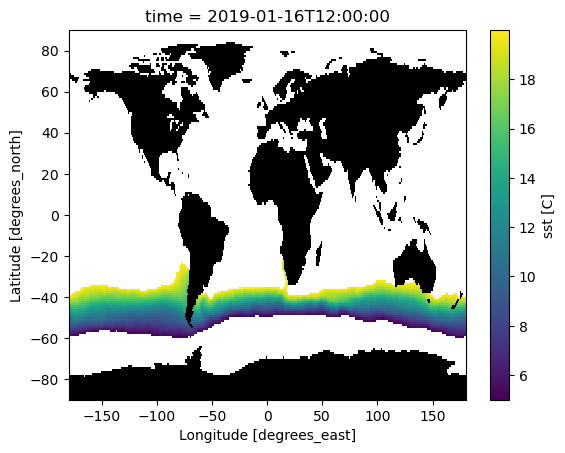

In [30]:
#Plot your SST subset at a single time
plt.gca().pcolormesh(ds.longitude,ds.latitude, ds.land,cmap=plt.cm.gray_r) #hack for adding land so we know where we are
sst_subset.sel(time='2019-01').plot()

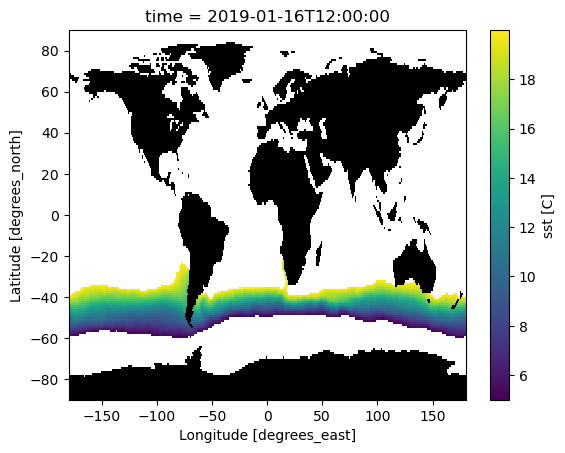

In [31]:
#or do the same thing with all of the commands together
#Note: the syntax must be exactly as is here otherwise you will get an error!
sst_subset=ds.sst.where((ds.sst>=5.0) & (ds.sst<=20.0) & (ds.latitude<0.0))

#plot again
plt.gca().pcolormesh(ds.longitude,ds.latitude, ds.land,cmap=plt.cm.gray_r) #hack for adding land so we know where we are
sst_subset.sel(time='2019-01').plot()

### Doing computations on xarray Datasets and DataArrays

When you do computations on xarray objects, the coordinates are preserved. You can apply most numpy functions to Datasets and Datarrays. Like Pandas though, not every function from a package is designed to work with xarray objects. You can still apply these functions to your xarray data, but the output will not be an xarray DataArray or Dataset unless you use [apply_ufunc](http://xarray.pydata.org/en/stable/generated/xarray.apply_ufunc.html)

In [32]:
sst_mn=ds.sst.mean(dim='time') #you can supply dimension names instead of numerical axes indices

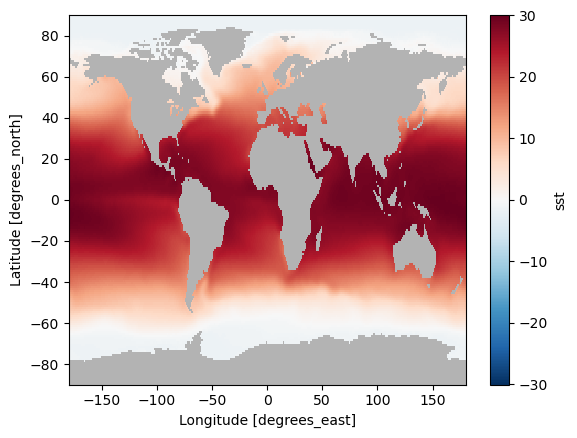

In [33]:
#Quick plot with built-in xarray plotting
sst_mn.plot()
plt.gca().set_facecolor('0.7') #make the plot background light gray

If you supply more than one dimension at a time, it needs to be a tuple:

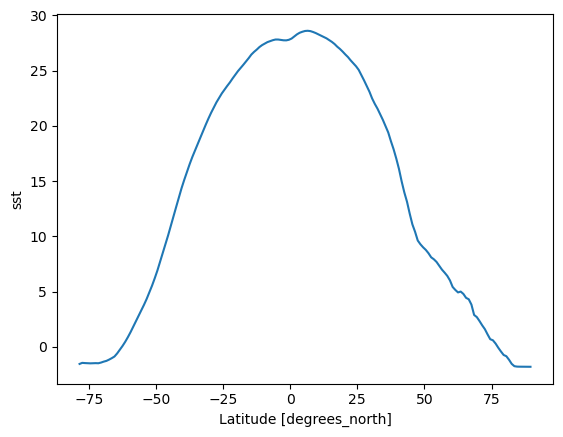

In [34]:
#Plot the zonal mean, time mean SSTs
sst_zn_mn=ds.sst.mean(dim=('time','longitude'))
sst_zn_mn.plot()

Another example:

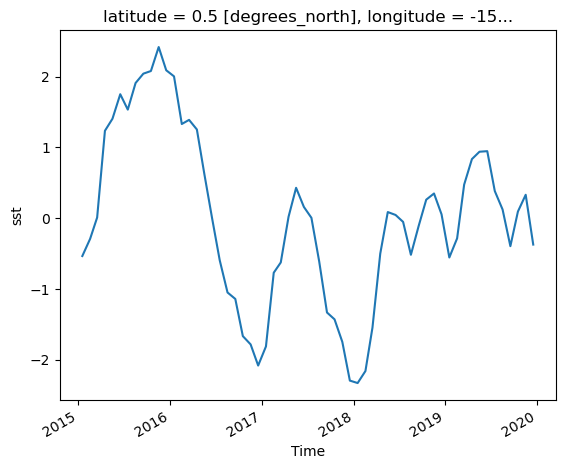

In [35]:
#Plot SST anomalies at a point in the equatorial Pacific Ocean
sst_pac=ds.sst.sel(latitude=0.5,longitude=-150.5)
sst_anom=sst_pac-sst_pac.mean()
sst_anom.plot()

#### Broadcasting no more!
Because our data is labeled, xarray can handle broadcasting internally. The hell that is broadcasting with numpy arrays is not a problem in xarray! Below we'll print the shapes of the longitude coordinate and the sst data from our dataset:

In [36]:
print(ds.longitude.shape)
print(ds.sst.shape)

(360,)
(60, 180, 360)


As a contrived example (i.e., one that you'll probably not find yourself needing to do), let's multiply the 3D SST data by the 1D longitude. If we were using standard numpy arrays we'd have to do some broadcasting/tiling first before we could multiply these two arrays together, but <b>this is _NOT_ the case with xarray labeled data!</b> All you have to do is multiply them:

In [37]:
sst_times_lon=ds.sst*ds.longitude
sst_times_lon.shape

(60, 180, 360)

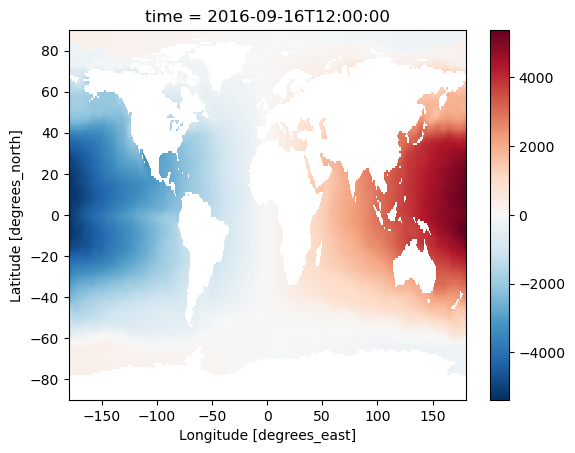

In [38]:
#plot the data at one time
sst_times_lon.sel(time='2016-09').plot()

#### Groupby
[Groupby](http://xarray.pydata.org/en/stable/user-guide/groupby.html) also exists in xarray, and it works much the same way it does in pandas. You can do many computations with groupby, and you'll get a chance to practice with it more in your homework. Here are some examples:

<b>Example 1</b>: Compute the mean SST for each year

In [39]:
sst_ann_mn=ds.sst.groupby('time.year').mean('time')
sst_ann_mn.shape

(5, 180, 360)

<b>Example 2</b>: Compute seasonal mean SSTs

><b><u><font color='red' size=3.5>CAUTION:</font></u> when grouping by `time.season` xarray is NOT smart enough to know to group December of the previous year with January and February of the current year. Instead it will group December, January, and February of the same year!</b>

In [40]:
sst_seasonal_mn=ds.sst.groupby('time.season').mean('time')

In [41]:
#Look at the dimensions of seasonal mean SSTs
sst_seasonal_mn.dims

('season', 'latitude', 'longitude')

In [42]:
#Access the contents of the 'season' dimension
sst_seasonal_mn.season

<xarray.DataArray 'season' (season: 4)>
array(['DJF', 'JJA', 'MAM', 'SON'], dtype=object)
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

Text(0.5, 1.0, 'SH Spring (SON) - Fall (MAM) SSTs')

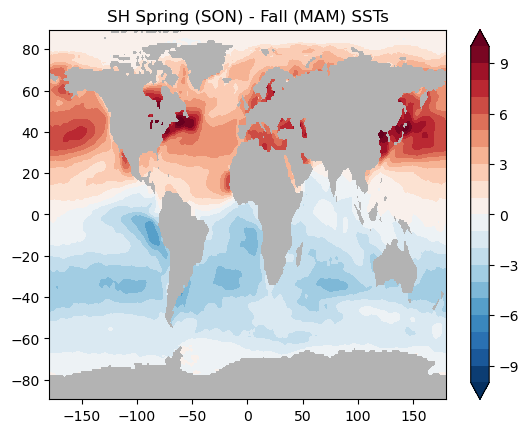

In [43]:
#Plot the difference between (Southern Hemisphere) spring and fall SSTs
plt.gca().set_facecolor('0.7')
cs=plt.contourf(ds.longitude, ds.latitude,sst_seasonal_mn.sel(season='SON')-sst_seasonal_mn.sel(season='MAM'),
                  cmap=plt.cm.RdBu_r,levels=np.arange(-10,11,1),extend='both')
plt.colorbar()
plt.title('SH Spring (SON) - Fall (MAM) SSTs')

<font color='red'><b><u>Dealing with DJF properly</u></b></font><br>
The below code is a workaround for grouping the correct December with the correct January and February for winter. The code isolates DJF with `where()` and uses a rolling mean to compute the seasonal mean for DJF. As a result Jan and Feb of the 1st year of data and Dec of the last year of data are excluded, but this is fine as these do not have complete information for a full DJF mean.

In [44]:
sst_djf=ds.sst.where(ds['time.season']=='DJF')
sst_djf=sst_djf.rolling(min_periods=3,center=True,time=3).mean()
sst_djf=sst_djf.mean('time')

To get a sense of how this can impact our plots, let's compare two time series for the correct vs incorrect way of computing DJF:

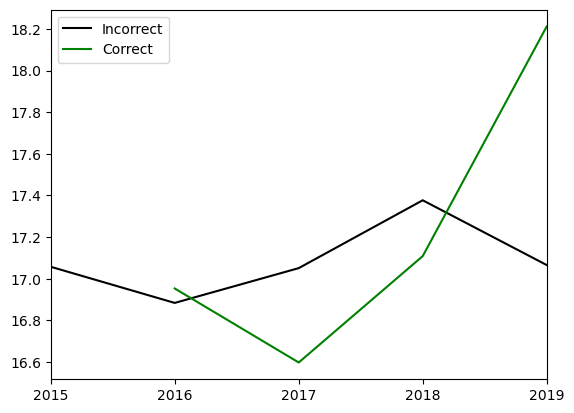

In [45]:
#The incorrect way
lat=-40
lon=50
sst_seasonal=ds.sst.sel(latitude=lat,longitude=lon,method='nearest').sel(time=ds.time.dt.season=='DJF')
sst_djf_v1=sst_seasonal.groupby(sst_seasonal.time.dt.year).mean('time')

#The correct way
#We have to do a few extra/different steps to group the correct Decembers with the correct Jans and Febs
sst_djf_v2=ds.sst.sel(latitude=lat,longitude=lon,method='nearest').rolling(min_periods=3,center=True,time=3).mean()
#min_periods=2 would let us keep the first J-F mean as a data pt for 2015, which is reasonably ok 
#even if we don't have Dec 2014
sst_djf_v2=sst_djf_v2.sel(time=sst_djf_v2.time.dt.month==1) #Choose only the rolling means centered on January
#to get the correct DJF sequence because the time window is 3

plt.plot(sst_djf_v1,label='Incorrect',color='k')
plt.plot(sst_djf_v2,label='Correct',color='g')
plt.gca().set_xlim((0,4))
plt.gca().set_xticks(np.arange(0,5))
plt.gca().set_xticklabels(np.arange(2015,2020))
plt.legend()

### Saving your data
You can [save your xarray Datasets in many formats](http://xarray.pydata.org/en/stable/user-guide/io.html), including netcdf. To save your Dataset to a netcdf file, use [to_netcdf](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.to_netcdf.html). For practice, let's save one year of SSTs to a netcdf file:

In [46]:
ds_to_save=ds.sel(time=slice('2015-01','2015-12'))

In [47]:
ds_to_save.to_netcdf('HadSST_201501-201512.nc')

Now try opening your saved dataset:

In [48]:
ds2=xr.open_dataset('HadSST_201501-201512.nc')
ds2

<xarray.Dataset>
Dimensions:    (time: 12, nv: 2, latitude: 180, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-16T12:00:00 ... 2015-12-16T12:00:00
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
    land       (latitude, longitude) bool ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    14/9/2021 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

---